Всем привет!

Этот ноутбук - туториал к библиотеке [**nba-on-court**](https://github.com/shufinskiy/nba-on-court). В нём я покажу все доступные функции библиотеки, а также кейсы, которые можно с её помощью релизовать.

Туториал будет полезен как новым пользователям библиотеки, так и тем, кто уже пользовался nba-on-court версии 0.1.1, потому что в новой версии был значительно расширен функционал.

**nba-on-court** - это библиотека, написанная на языке **python** и предназначенная для работы с play-by-play данными Национальной Баскетбольной Ассоциации (НБА). Первоначально она имела только две функции:
- **players_on_court** - добавление к каждому событию ID игроков, которые находятся на площадке
- **players_name** - замена ID игроков их именами

В версии 0.2.0 в библиотеку были добавлены новые возможности, которые расширяют её использование:
- Быстрая загрузка play-by-play данных и shotdetail из репозитория [**nba_data**](https://github.com/shufinskiy/nba_data)
- Объединение play-by-play данных из двух источников: **nba.stats.com** и **pbpstats.com**

## Содержание

1. ### Загрузка данных из репозитория **nba_data**
2. ### Добавление информации об игроках на площадке
3. ### Объединение play-by-play данных из разных источников
4. ### Примеры использования
    - #### Построение карт бросков
    - #### *Расчёт RAPM (Regularized Adjusted Plus-Minus)* <span style='color:red;'>В процессе</span> 

## Быстрая загрузка данных из репозитория [nba_data](https://github.com/shufinskiy/nba_data)

С помощью прошлой версии библиотеки не было возможности получить play-by-play данные, для этого было необходимо использовать сторонние решения, например библиотеку [**nba_api**](https://github.com/swar/nba_api). Она использует NBA API для получения данных. Минус такого подхода в скорости: на сайте НБА довольно жёткие лимиты на количество запросов, поэтому сбор play-by-play данных одного сезона может занять несколько часов. 

Репозиторий **nba_data** - это собранные мною play-by-play данные из трёх источников (nba.stats.com, pbpstats.com, data.nba.com), а также shotdetail за все игры (регулярный сезон и плей-офф) с сезона 1996/97 (данные из pbpstats.com и data.nba.com есть с сезона их появления). Благодаря тому, что вы просто скачиваете файл с github загрузка одного сезона play-by-play данных займёт несколько секунд (зависит от скорости вашего интернета). За 5-10 минут можно скачать весь массив данных за 28 сезонов!!! Для этого в библиотеку добавлена функция **load_nba_data**

Я обновляю репозиторий **nba_data** раз в неделю в течении сезона, так что из него, скорее всего, нельзя будет получить игры последних нескольких дней. Данные этих игр, как и раньше, можно получить с помощью библиотеки **nba_api**

Функция **load_nba_data** имеет пять параметров:

- **path** - путь, куда на жёстком диске нужно сохранить скачанный файл
- **seasons** - сезоны, за которые вы хотите получить данные. Нужно указывать год начала сезона: если вы хотите получить данные за сезон 2008/2009 вы должны написать **seasons = 2008**. Также можно скачать несколько сезонов за один раз
- **data** - какой тип данных вы хотите скачать. Есть четыре варианта (можно выбрать сразу все или несколько):
    - datanba - play-by-play данные с data.nba.com (доступны с сезона 2016/17)
    - nbastats - play-by-play данные с nba.stats.com (доступны с сезона 1996/97)
    - pbpstats - play-by-play данные с pbpstats.com (доступны с сезона 2000/01)
    - shotdetail - информация о бросках (доступна с сезона 1996/1997)
    
    Описание данных можете найти в файле [**description_fields**](https://github.com/shufinskiy/nba_data/blob/main/description_fields.md)
- **seasontype** - тип сезона НБА (регулярный сезон или плей-офф)
- **untar** - нужно ли разархивировать файл(ы)? Если False, то на вашем жестком диске появится архив tar.xz, если True, то он будет разархивирован в csv-файл, а сам архив удалён.

In [1]:
from pathlib import Path

import nba_on_court as noc
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

Сначала загрузим файл с play-by-play данными сезона 2022/23 с nba.stats.com

Посмотрим какие файлы есть в текущей папке

In [2]:
!ls -la

итого 43328
drwxrwxr-x 3 shuf91 shuf91     4096 окт 18 14:05 .
drwxr-xr-x 9 shuf91 shuf91     4096 окт 10 22:48 ..
-rw-r--r-- 1 shuf91 shuf91   220955 окт 18 14:05 create_nba_court.ipynb
drwxr-xr-x 2 shuf91 shuf91     4096 окт 18 11:28 .ipynb_checkpoints
-rw-r--r-- 1 shuf91 shuf91 44092601 апр 10  2023 shotdetail_2022.csv
-rw-r--r-- 1 shuf91 shuf91    36066 окт 16 16:36 tutorial.ipynb


In [3]:
noc.load_nba_data(seasons=2022, data='nbastats')

Снова проверим директорию

In [4]:
!ls -la

итого 51680
drwxrwxr-x 3 shuf91 shuf91     4096 окт 18 14:06 .
drwxr-xr-x 9 shuf91 shuf91     4096 окт 10 22:48 ..
-rw-r--r-- 1 shuf91 shuf91   220955 окт 18 14:05 create_nba_court.ipynb
drwxr-xr-x 2 shuf91 shuf91     4096 окт 18 11:28 .ipynb_checkpoints
-rw-r--r-- 1 shuf91 shuf91  8551312 окт 18 14:06 nbastats_2022.tar.xz
-rw-r--r-- 1 shuf91 shuf91 44092601 апр 10  2023 shotdetail_2022.csv
-rw-r--r-- 1 shuf91 shuf91    36066 окт 16 16:36 tutorial.ipynb


Часто вам понадобятся данные за несколько сезонов. Сейчас мы загрузим nbastats по 
последним пяти регулярным сезонам. Файлы сразу разархивируем, чтобы их можно было сразу использовать.

In [5]:
noc.load_nba_data(seasons=range(2018, 2023), data='nbastats', untar=True)

Загрузим данные с помощью библиотеки **pandas**

In [6]:
nbastats = pd.concat([pd.read_csv(x) for x in Path.cwd().glob('*.csv')], axis=0, ignore_index=True)

In [7]:
nbastats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946549 entries, 0 to 2946548
Data columns (total 56 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   GRID_TYPE                  object 
 1   GAME_ID                    int64  
 2   GAME_EVENT_ID              float64
 3   PLAYER_ID                  float64
 4   PLAYER_NAME                object 
 5   TEAM_ID                    float64
 6   TEAM_NAME                  object 
 7   PERIOD                     int64  
 8   MINUTES_REMAINING          float64
 9   SECONDS_REMAINING          float64
 10  EVENT_TYPE                 object 
 11  ACTION_TYPE                object 
 12  SHOT_TYPE                  object 
 13  SHOT_ZONE_BASIC            object 
 14  SHOT_ZONE_AREA             object 
 15  SHOT_ZONE_RANGE            object 
 16  SHOT_DISTANCE              float64
 17  LOC_X                      float64
 18  LOC_Y                      float64
 19  SHOT_ATTEMPTED_FLAG        float64
 20  SH

In [8]:
### Проверка минимального и максимального GAME_ID в датафрейме
np.min(nbastats.GAME_ID), np.max(nbastats.GAME_ID)

(21800001, 22201230)

In [9]:
### Удаление датафрейма nbastats из оперативной памяти и скачанных файлов с диска
del nbastats
!rm nbastats_2022.csv nbastats_2021.csv nbastats_2020.csv nbastats_2019.csv nbastats_2018.csv

In [10]:
!ls -la

итого 43328
drwxrwxr-x 3 shuf91 shuf91     4096 окт 18 14:07 .
drwxr-xr-x 9 shuf91 shuf91     4096 окт 10 22:48 ..
-rw-r--r-- 1 shuf91 shuf91   220955 окт 18 14:05 create_nba_court.ipynb
drwxr-xr-x 2 shuf91 shuf91     4096 окт 18 11:28 .ipynb_checkpoints
-rw-r--r-- 1 shuf91 shuf91 44092601 апр 10  2023 shotdetail_2022.csv
-rw-r--r-- 1 shuf91 shuf91    36066 окт 16 16:36 tutorial.ipynb


## Добавление информации об игроках на площадке

Эта возможность была доступна в прошлой версии библиотеки, но в версии 0.2.0 претерпела небольшое изменение, призванное упростить работу с полученным датафреймом.

Что делает функция **players_on_court**? Для каждого события на площадке она добавляет 10 столбцов с ID игроков, которые находились на площадке в этот момент. Делается это по следующему алгоритму:

1. Из play-by-play данных для периода игры (четверти или ОТ) получаем информацию о том, какие 10 человек были на площадке в момент начала периода.
2. "Проходим" play-by-play данные для периода игры сверху вниз и при заменах меняем ID игрока в столбце.

Бывают случаи, когда алгоритм не может однозначно опеределить 10 игроков на шаге 1, в таком случае мы с помощью __*nba_api.BoxScoreTraditionalV2*__ получаем статистику периода игры и ID всех игроков, которые были на площадке на этом отрезке и запускаем алгоритм снова. Такое случается в 1-2% случаев, чаще в ОТ, поэтому для корректной работы функции может потребоваться подключение к интернету (а для пользователей из России и Беларуси ещё и ВПН, т.к. nba.stats блочит IP)

Функция **player_name** заменяет ID игроков на имя-фамилию. С помощью __*nba_api.CommonAllPlayers*__ она получает таблицу, где каждому ID соответствует имя игрока и производит замену. Обратите внимание, что замену нужно производить после всех необходимых расчётов, т.к. имя-фамилия игроков неуникальны (есть полные тёзки), а вот ID уникален.

Изменение, внесённое в выпуск библиотеки 0.2.0 касается наименования столбцов с ID игроков, которые добавляются в функции **players_on_court**. Дело в том, что столбцы с ID идут в строгом порядке: сначала 5 столбцов для игроков гостей, затем 5 столбцов для команды хозяев. Но из их названий в версии 0.1.1 (PLAYER1:PLAYER10) это было неочевидно. Теперь в названия добавлены префиксы AWAY и HOME, что делает структуру очевидной.

In [11]:
### Загрузим pbp данные плей-офф сезона 2022/23 nba.stats
noc.load_nba_data(seasons=2022, data='nbastats', seasontype='po', untar=True)

In [12]:
po_df = pd.read_csv('nbastats_po_2022.csv')
po_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38216 entries, 0 to 38215
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GAME_ID                    38216 non-null  int64  
 1   EVENTNUM                   38216 non-null  int64  
 2   EVENTMSGTYPE               38216 non-null  int64  
 3   EVENTMSGACTIONTYPE         38216 non-null  int64  
 4   PERIOD                     38216 non-null  int64  
 5   WCTIMESTRING               38216 non-null  object 
 6   PCTIMESTRING               38216 non-null  object 
 7   HOMEDESCRIPTION            19759 non-null  object 
 8   NEUTRALDESCRIPTION         854 non-null    object 
 9   VISITORDESCRIPTION         19550 non-null  object 
 10  SCORE                      10394 non-null  object 
 11  SCOREMARGIN                10394 non-null  object 
 12  PERSON1TYPE                38216 non-null  int64  
 13  PLAYER1_ID                 38216 non-null  int

In [13]:
po_df.head(2)

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,42200101,2,12,0,1,5:51 PM,12:00,NaN,Start of 1st Period (5:51 PM EST),NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
1,42200101,4,10,0,1,5:51 PM,12:00,Jump Ball Lopez vs. Adebayo: Tip to Butler,NaN,NaN,NaN,NaN,4,201572,Brook Lopez,1.610613e+09,Milwaukee,Bucks,MIL,5,1628389,Bam Adebayo,1.610613e+09,Miami,Heat,MIA,5,202710,Jimmy Butler,1.610613e+09,Miami,Heat,MIA,0


In [14]:
### Выделим в отдельный датафрейм первую игру плей-офф (Милуоки-Майами)
mil_mia = po_df.loc[po_df['GAME_ID'] == 42200101]
mil_mia.head(2)

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,42200101,2,12,0,1,5:51 PM,12:00,NaN,Start of 1st Period (5:51 PM EST),NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
1,42200101,4,10,0,1,5:51 PM,12:00,Jump Ball Lopez vs. Adebayo: Tip to Butler,NaN,NaN,NaN,NaN,4,201572,Brook Lopez,1.610613e+09,Milwaukee,Bucks,MIL,5,1628389,Bam Adebayo,1.610613e+09,Miami,Heat,MIA,5,202710,Jimmy Butler,1.610613e+09,Miami,Heat,MIA,0


In [15]:
### Добавим данные об игроках на площадке
mil_mia = noc.players_on_court(mil_mia)
mil_mia.head(2)

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG,AWAY_PLAYER1,AWAY_PLAYER2,AWAY_PLAYER3,AWAY_PLAYER4,AWAY_PLAYER5,HOME_PLAYER1,HOME_PLAYER2,HOME_PLAYER3,HOME_PLAYER4,HOME_PLAYER5
0,42200101,2,12,0,1,5:51 PM,0,NaN,Start of 1st Period (5:51 PM EST),NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1629622,1629639,1629216,202710,1628389,201572,203114,201950,1628960,203507
1,42200101,4,10,0,1,5:51 PM,0,Jump Ball Lopez vs. Adebayo: Tip to Butler,NaN,NaN,NaN,NaN,4,201572,Brook Lopez,1.610613e+09,Milwaukee,Bucks,MIL,5,1628389,Bam Adebayo,1.610613e+09,Miami,Heat,MIA,5,202710,Jimmy Butler,1.610613e+09,Miami,Heat,MIA,0,1629622,1629639,1629216,202710,1628389,201572,203114,201950,1628960,203507


In [16]:
### Давайте заменим ID игроков на их имена
cols = [''.join(['AWAY_PLAYER', str(x)]) if x < 6 else ''.join(['HOME_PLAYER', str(x-5)]) for x in range(1, 11)]
mil_mia.loc[:, cols] = mil_mia.loc[:, cols].apply(noc.players_name, result_type="expand")
mil_mia.head(2)

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG,AWAY_PLAYER1,AWAY_PLAYER2,AWAY_PLAYER3,AWAY_PLAYER4,AWAY_PLAYER5,HOME_PLAYER1,HOME_PLAYER2,HOME_PLAYER3,HOME_PLAYER4,HOME_PLAYER5
0,42200101,2,12,0,1,5:51 PM,0,NaN,Start of 1st Period (5:51 PM EST),NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,Max Strus,Tyler Herro,Gabe Vincent,Jimmy Butler,Bam Adebayo,Brook Lopez,Khris Middleton,Jrue Holiday,Grayson Allen,Giannis Antetokounmpo
1,42200101,4,10,0,1,5:51 PM,0,Jump Ball Lopez vs. Adebayo: Tip to Butler,NaN,NaN,NaN,NaN,4,201572,Brook Lopez,1.610613e+09,Milwaukee,Bucks,MIL,5,1628389,Bam Adebayo,1.610613e+09,Miami,Heat,MIA,5,202710,Jimmy Butler,1.610613e+09,Miami,Heat,MIA,0,Max Strus,Tyler Herro,Gabe Vincent,Jimmy Butler,Bam Adebayo,Brook Lopez,Khris Middleton,Jrue Holiday,Grayson Allen,Giannis Antetokounmpo


In [17]:
### Удаляем файл nbastats_po_2022.csv
!rm nbastats_po_2022.csv

Вы можете использовать функцию замены ID игроков на имена не только в сырых данных play-by-play. Например, функцию можно применить к датафрейму, полученному после некоторых расчётов. Далее мы посчитаем топ-10 пар по передачам в сезоне 2022/23, а затем заменим их ID на имена и получим таким образом таблицу, которой можно делится с баскетбольным сообществом.

In [18]:
### Загрузка данных на диск
noc.load_nba_data(seasons=2022, data='nbastats', untar=True)

In [19]:
### Загрузка датафрейма
ast_df = pd.read_csv('nbastats_2022.csv')
ast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574410 entries, 0 to 574409
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   GAME_ID                    574410 non-null  int64  
 1   EVENTNUM                   574410 non-null  int64  
 2   EVENTMSGTYPE               574410 non-null  int64  
 3   EVENTMSGACTIONTYPE         574410 non-null  int64  
 4   PERIOD                     574410 non-null  int64  
 5   WCTIMESTRING               574410 non-null  object 
 6   PCTIMESTRING               574410 non-null  object 
 7   HOMEDESCRIPTION            297481 non-null  object 
 8   NEUTRALDESCRIPTION         12299 non-null   object 
 9   VISITORDESCRIPTION         294016 non-null  object 
 10  SCORE                      159376 non-null  object 
 11  SCOREMARGIN                159376 non-null  object 
 12  PERSON1TYPE                574408 non-null  float64
 13  PLAYER1_ID                 57

Точные броски и передачи определяются следующим образом: точный бросок имеет **EVENTMSGTYPE = 1**, при этом в стоблце **PLAYER1_ID** будет указан ID бросающего, а в **PLAYER2_ID** ID отдавшего передачу

In [20]:
ast_df = (
    ast_df
    .pipe(lambda df_: df_.loc[(df_.EVENTMSGTYPE == 1) & (~pd.isna(df_.PLAYER2_ID)) & (df_.PLAYER2_ID != 0)])
    .groupby(['PLAYER1_ID', 'PLAYER2_ID'], as_index=False)
    .size()
    .rename(
        columns = {
            'PLAYER1_ID': 'SHOT_PLAYER',
            'PLAYER2_ID': 'AST_PLAYER',
            'size': 'AST_COUNT'
        }
    )
    .sort_values(by='AST_COUNT', ascending=False)
    .head(10)
    .reset_index(drop=True)
)
ast_df

,SHOT_PLAYER,AST_PLAYER,AST_COUNT
0,203954,201935,244
1,203932,203999,155
2,203991,1629027,152
3,1630596,1629636,152
4,203999,1627750,152
5,1628989,1627734,149
6,1627741,1630169,140
7,1628381,1629027,133
8,201572,201950,133
9,1629028,101108,132


In [21]:
### Заменим ID игроков на их имена
cols = ['SHOT_PLAYER', 'AST_PLAYER']
ast_df.loc[:, cols] = ast_df.loc[:, cols].apply(noc.players_name, result_type="expand")
ast_df

,SHOT_PLAYER,AST_PLAYER,AST_COUNT
0,Joel Embiid,James Harden,244
1,Aaron Gordon,Nikola Jokic,155
2,Clint Capela,Trae Young,152
3,Evan Mobley,Darius Garland,152
4,Nikola Jokic,Jamal Murray,152
5,Kevin Huerter,Domantas Sabonis,149
6,Buddy Hield,Tyrese Haliburton,140
7,John Collins,Trae Young,133
8,Brook Lopez,Jrue Holiday,133
9,Deandre Ayton,Chris Paul,132


In [22]:
### Удаление данных с жёсткого диска
!rm nbastats_2022.csv

## Объединение play-by-play данных из разных источников

Иногда для решения задачи нужно объединить несколько датафреймов из разных источников. Например мы хотим узнать как влияет на shot selection (выбор локации броска) игрока присутствие/отсутствие партнёра на паркете. Для этого нам нужны детальные данные бросков (где есть координаты и зоны бросков), а также play-by-play данные с информацией о присутствии на площадке, чтобы разделить броски по нужному признаку. В репозитории [**nba_data**](https://github.com/shufinskiy/nba_data) 3 источника данных (nba.stats, data.stats и shotdetail) на самом деле имеют единое происхождение: сайт НБА. Поэтому их довольно легко объёдинить по двум ключам (название столбцов в разных источниках отличается):

- ID игры
- ID события в игре

С данными от pbpstats.com сложнее: они изначально имеют другую структуру (сгруппированы по владениям) поэтому в них нет ID события. При этом они содержат полезную информацию, которой нет в явном виде в других источниках (время владения, тип старта владения, url видео эпизода). Единственная возможность их объединить - это использовать описание события (DESCRIPTION). Здесь проблема в том, что описания в nba.stats и pbpstats также не совпадают и попытка их объединения напрямую приведёт к потере некоторого количества строк.

Для решения этой проблемы я создал функции **left_join_nbastats** и **left_join_pbpstats**. Они позволяют соединять данные play-by-play с nba.stats и pbpstats практически без ошибок.

Хоть описания событий в двух источниках не совпадают, но разница минимальна, обычно в каких-то спецсимволах. Поэтому мы можем попробовать объединить данные по нечёткому совпадению. Алгоритм следующий:

1. Для события из левого датафрейма получаем его описание и время.
2. Фильтруем правый датафрейм, удаляя все записи которые не попадают в интервал [время-alpha:время+alpha]
3. Считаем [**расстояние Левенштейна**](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна) между описаниями для каждой получившейся пары
4. Если расстояние меньше параметра beta, считаем, что описания совпадают

Помимо датафреймов с play-by-play данными функции имеют ещё два важных параметра:
- **alpha**: интервал времени. Насколько секунд вперёд/назад нужно смотреть данные в правом датафрейме относительно времени события в левом.
- **beta**: граница расхождения. Если расстояние между двумя описаниями больше beta, строки считаются несовпадающими и не объединяются.

Параметры настраиваемые, но я предложил бы оставить значения по умолчанию (5 и 0.2), которые подобраны опытным путём и хорошо работают.

Давайте объединим данные из двух источников для последней игры финальной серии сезона 2022/23

In [23]:
### Загрузка данных на диск
noc.load_nba_data(seasons=2022, data=('nbastats', 'pbpstats'), seasontype='po', untar=True)

In [24]:
### Загрузка датафеймов
nbastats = pd.read_csv('nbastats_po_2022.csv')
pbpstats = pd.read_csv('pbpstats_po_2022.csv')

In [25]:
nbastats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38216 entries, 0 to 38215
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GAME_ID                    38216 non-null  int64  
 1   EVENTNUM                   38216 non-null  int64  
 2   EVENTMSGTYPE               38216 non-null  int64  
 3   EVENTMSGACTIONTYPE         38216 non-null  int64  
 4   PERIOD                     38216 non-null  int64  
 5   WCTIMESTRING               38216 non-null  object 
 6   PCTIMESTRING               38216 non-null  object 
 7   HOMEDESCRIPTION            19759 non-null  object 
 8   NEUTRALDESCRIPTION         854 non-null    object 
 9   VISITORDESCRIPTION         19550 non-null  object 
 10  SCORE                      10394 non-null  object 
 11  SCOREMARGIN                10394 non-null  object 
 12  PERSON1TYPE                38216 non-null  int64  
 13  PLAYER1_ID                 38216 non-null  int

In [26]:
pbpstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32411 entries, 0 to 32410
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ENDTIME                            32411 non-null  object
 1   EVENTS                             32340 non-null  object
 2   FG2A                               32411 non-null  int64 
 3   FG2M                               32411 non-null  int64 
 4   FG3A                               32411 non-null  int64 
 5   FG3M                               32411 non-null  int64 
 6   GAMEDATE                           32411 non-null  object
 7   GAMEID                             32411 non-null  int64 
 8   NONSHOOTINGFOULSTHATRESULTEDINFTS  32411 non-null  int64 
 9   OFFENSIVEREBOUNDS                  32411 non-null  int64 
 10  OPPONENT                           32411 non-null  object
 11  PERIOD                             32411 non-null  int64 
 12  SHOO

In [27]:
### Узнаем ID последней игры финальной серии
game_id = np.max(nbastats.GAME_ID)
game_id

42200405

In [28]:
### Отфильтруем наши данные
nbastats = nbastats.loc[nbastats['GAME_ID'] == game_id].reset_index(drop=True)
pbpstats = pbpstats.loc[pbpstats['GAMEID'] == game_id].reset_index(drop=True)
nbastats.shape, pbpstats.shape

((463, 34), (396, 19))

In [29]:
### Объединим данные
full_pbp = noc.left_join_nbastats(nbastats, pbpstats)

In [30]:
full_pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GAME_ID                            463 non-null    int64  
 1   EVENTNUM                           463 non-null    int64  
 2   EVENTMSGTYPE                       463 non-null    int64  
 3   EVENTMSGACTIONTYPE                 463 non-null    int64  
 4   PERIOD                             463 non-null    int64  
 5   WCTIMESTRING                       463 non-null    object 
 6   PCTIMESTRING                       463 non-null    int64  
 7   SCORE                              106 non-null    object 
 8   SCOREMARGIN                        106 non-null    object 
 9   PERSON1TYPE                        463 non-null    int64  
 10  PLAYER1_ID                         463 non-null    int64  
 11  PLAYER1_NAME                       421 non-null    object 

In [31]:
full_pbp.iloc[9:12]

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG,DESCRIPTION_STATS,ENDTIME,EVENTS,FG2A,FG2M,FG3A,FG3M,GAMEDATE,GAMEID,NONSHOOTINGFOULSTHATRESULTEDINFTS,OFFENSIVEREBOUNDS,OPPONENT,SHOOTINGFOULSDRAWN,STARTSCOREDIFFERENTIAL,STARTTIME,STARTTYPE,TURNOVERS,DESCRIPTION_PBP,URL
9,42200405,16,2,47,1,8:41 PM,82,NaN,NaN,5,202710,Jimmy Butler,1.610613e+09,Miami,Heat,MIA,0,0,NaN,NaN,NaN,NaN,NaN,4,203484,Kentavious Caldwell-Pope,1.610613e+09,Denver,Nuggets,DEN,1,caldwell-pope block (1 blk) miss butler 5' turnaround jump shot,85.0,Caldwell-Pope BLOCK (1 BLK): MISS Butler 5' Turnaround Jump Shot\nHeat Rebound\nStrus 27' 3PT Ju...,1.0,0.0,1.0,1.0,2023-06-12,42200405.0,0.0,1.0,DEN,0.0,2.0,63.0,Off At Rim Miss,0.0,caldwell-pope block (1 blk): miss butler 5' turnaround jump shot,https://videos.nba.com/nba/pbp/media/2023/06/12/0042200405/16/59edc1b7-1891-636b-a702-d353240353...
10,42200405,18,4,0,1,8:41 PM,83,NaN,NaN,3,1610612748,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1,heat rebound,85.0,Caldwell-Pope BLOCK (1 BLK): MISS Butler 5' Turnaround Jump Shot\nHeat Rebound\nStrus 27' 3PT Ju...,1.0,0.0,1.0,1.0,2023-06-12,42200405.0,0.0,1.0,DEN,0.0,2.0,63.0,Off At Rim Miss,0.0,heat rebound,NaN
11,42200405,19,1,1,1,8:41 PM,85,5 - 0,-5,5,1629622,Max Strus,1.610613e+09,Miami,Heat,MIA,5,1629216,Gabe Vincent,1.610613e+09,Miami,Heat,MIA,0,0,NaN,NaN,NaN,NaN,NaN,1,strus 27' 3pt jump shot (3 pts) (vincent 1 ast),85.0,Caldwell-Pope BLOCK (1 BLK): MISS Butler 5' Turnaround Jump Shot\nHeat Rebound\nStrus 27' 3PT Ju...,1.0,0.0,1.0,1.0,2023-06-12,42200405.0,0.0,1.0,DEN,0.0,2.0,63.0,Off At Rim Miss,0.0,strus 27' 3pt jump shot (3 pts) (vincent 1 ast),https://videos.nba.com/nba/pbp/media/2023/06/12/0042200405/19/fa77af90-028d-77b8-f2d2-c38e1db033...


In [32]:
### Удаляем файлы с диска
!rm nbastats_po_2022.csv pbpstats_po_2022.csv

## Примеры применения

### Построение карты бросков.

Библиотека **nba-on-court** версии 0.2.0 серьёзно расширила границы своей применимости: теперь её можно использовать для быстрого доступа к play-by-play данным и данным по броскам, а также для объединения разных источников для обогащения данных. Выше в ноутбуке мы уже решили один практический кейс (посчитали топ-10 пар игроков, в которых один игрок ассистировал другому), дальше я покажу ещё парочку примеров.

Начнём с визуализации карты бросков. В простейшем случае библиотека используется только как способ быстрого получения данных, но если на данные нужно накладывать фильтры (броски только когда партнёр был/не был на площадке, только во владениях после пропущенного броска и длительностью не менее 8 секунд и т.п.) могут понадобиться и другие функции, реализованные в **nba-on-court**.

В данном туториале мы построим две простых карты бросков для Леброна Джеймса в сезоне 2022/23.

In [33]:
### Загрузка библиотеки matplotlib и её модулей
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [34]:
### Загрузка данных на диск
noc.load_nba_data(seasons=2022, data='shotdetail', untar=True)

In [35]:
### Загрузка датафрейма
df = pd.read_csv('shotdetail_2022.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217218 entries, 0 to 217217
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   GRID_TYPE            217218 non-null  object
 1   GAME_ID              217218 non-null  int64 
 2   GAME_EVENT_ID        217218 non-null  int64 
 3   PLAYER_ID            217218 non-null  int64 
 4   PLAYER_NAME          217218 non-null  object
 5   TEAM_ID              217218 non-null  int64 
 6   TEAM_NAME            217218 non-null  object
 7   PERIOD               217218 non-null  int64 
 8   MINUTES_REMAINING    217218 non-null  int64 
 9   SECONDS_REMAINING    217218 non-null  int64 
 10  EVENT_TYPE           217218 non-null  object
 11  ACTION_TYPE          217218 non-null  object
 12  SHOT_TYPE            217218 non-null  object
 13  SHOT_ZONE_BASIC      217218 non-null  object
 14  SHOT_ZONE_AREA       217218 non-null  object
 15  SHOT_ZONE_RANGE      217218 non-nu

In [37]:
df.head(3)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,22200005,7,1627749,Dejounte Murray,1610612737,Atlanta Hawks,1,11,44,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,18,77,172,1,1,20221019,ATL,HOU
1,Shot Chart Detail,22200005,10,1629027,Trae Young,1610612737,Atlanta Hawks,1,11,14,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,36,1,363,1,0,20221019,ATL,HOU
2,Shot Chart Detail,22200005,15,1627749,Dejounte Murray,1610612737,Atlanta Hawks,1,10,49,Missed Shot,Running Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-201,147,1,0,20221019,ATL,HOU


In [38]:
### Фильтруем общий датафрейм по PLAYER_ID и удаляем лишние столбцы
lebron = (
    df
    .pipe(lambda df_: df_.loc[df_.PLAYER_ID == 2544])
    .loc[:, ['LOC_X','LOC_Y', 'SHOT_MADE_FLAG']]
    .reset_index(drop=True)
)

In [39]:
lebron.head(3)

,LOC_X,LOC_Y,SHOT_MADE_FLAG
0,-37,258,0
1,18,160,0
2,-70,91,0


Задачей данного ноутбука не явлется обучение визуализировать НБА данные, поэтому мы просто воспользуемся готовыми решениями из интернета.
- Для построения баскетбольной площадки возьмём функцию **draw_court** из ноутбука [**Visualizing NBA Shots with py-Goldsberry**](https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb)
- Логику построения гексагонального графика из kaggle-ноутбука [**NCAA Basketball Court Plot Helper Functions**](https://www.kaggle.com/code/robikscube/ncaa-basketball-court-plot-helper-functions)

In [40]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

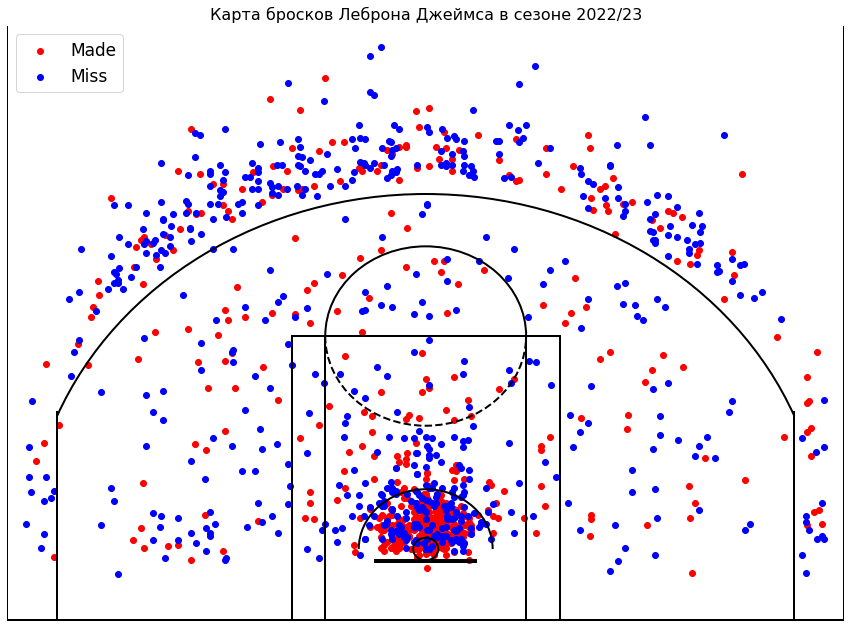

In [41]:
### Строим карту бросков
plt.figure(figsize=(15,11))
plt.scatter(lebron.loc[lebron['SHOT_MADE_FLAG'] == 1, 'LOC_X'], 
            lebron.loc[lebron['SHOT_MADE_FLAG'] == 1, 'LOC_Y'], 
            color = 'red', label='Made')
plt.scatter(lebron.loc[lebron['SHOT_MADE_FLAG'] == 0, 'LOC_X'], 
            lebron.loc[lebron['SHOT_MADE_FLAG'] == 0, 'LOC_Y'], 
            color = 'blue', label='Miss')
draw_court(outer_lines=True, color="black")
plt.xlim(-250,250)
plt.ylim(-50,350)
plt.axis('off')
plt.legend(loc='upper left', fontsize=17)
plt.title('Карта бросков Леброна Джеймса в сезоне 2022/23', size=16)
plt.show()

Графики с точками обычно являются неинформативными из-за большой плотности точек в некоторых зонах площадки, в первую очередь под кольцом, у игроков с большим числом бросков. Поэтому для демонстрации обычно используют графики других типов, например гексагональные. В них площадка разбивается на шестиугольники, для каждого из которых считается число точек (бросков) в него попавших. Далее заливкой показывается плотность этих бросков.

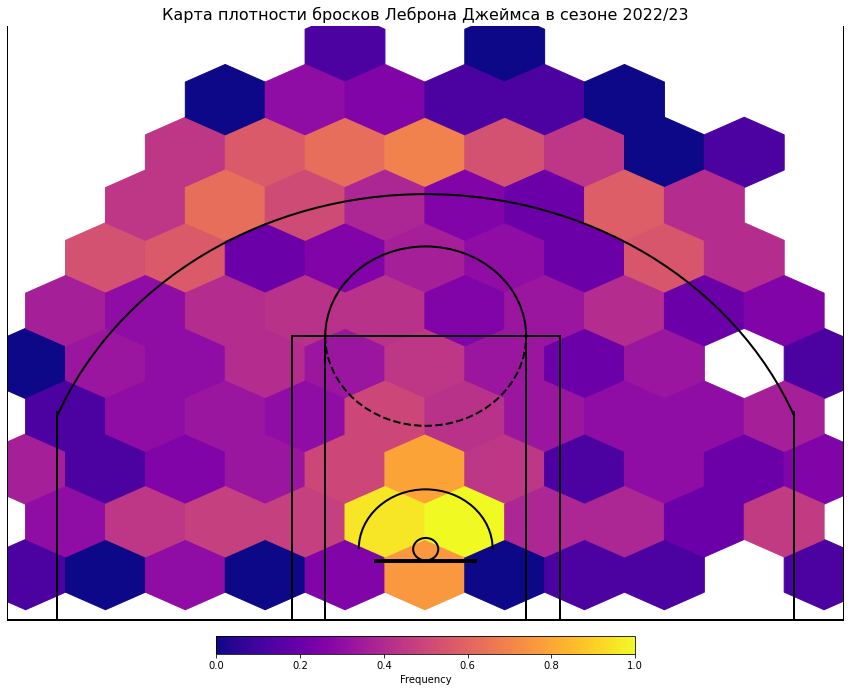

In [43]:
norm = mpl.colors.Normalize()
colormap = mpl.colormaps['plasma']

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)
ax.hexbin(lebron.LOC_X, lebron.LOC_Y, gridsize=10, bins='log', cmap='plasma')
draw_court(outer_lines=True, color="black")
plt.xlim(-250,250)
plt.ylim(-50,350)
plt.axis('off')
plt.title('Карта плотности бросков Леброна Джеймса в сезоне 2022/23', size=16)
axins = inset_axes(ax,
                   width="50%",
                   height="3%",
                   loc='lower left',
                   bbox_to_anchor=(0.25, -0.05, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), cax=axins, ax=ax,
             label='Frequency', orientation='horizontal')
plt.show();

С помощью библиотек для визуализации в языках R и Python можно построить действительно отличные графики.
Вот пример гексагонального графика для бросков Рассела Уэстбрука в сезоне 2021/22 относительно среднего по Лиге из моего kaggle-ноутбука [**NBA play-by-play dataset R example**](https://www.kaggle.com/code/brains14482/nba-play-by-play-dataset-r-example)
![](shot_chart.png)

In [44]:
### Удаляем файлы с диска
!rm shotdetail_2022.csv

### Расчёт RAPM (Regularized Adjusted Plus-Minus) <span style='color:red;'>В ПРОЦЕССЕ</span>